# Dimensionality Reduction Algorithm

- t-SNE
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Multidimensional Scaling (MDS)
- kernal PCA

 ### T-distributed Stochastic Neighbor Embedding (t-SNE) 
 
t-SNE is a ML algorithm for visualization. Its a nonlinear dimensionality reduction technique (also called manifold learning). Manifold structures are like cylinder, ball, curve, etc
 
PCA was developed in 1933 while t-SNE was developed in 2008. PCA is one such basic dimensionality reduction technique, where we do an orthogonal transformation, so that the resultant components are linearly uncorrelated, orthogonal and maximise the variance.  PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures.

tSNE is a more powerful technique that is capable of preserving the local structure as well as the global structure of the data. That is, the aim of tSNE is to preserve as much of the significant structure in the high dimensional points as possible, in the low dimensional map.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high

### setting the perplexity in t-SNE

The performance of t-SNE is fairly robust under different settings of the perplexity. The most appropriate value depends on the density of your data. Loosely speaking, one could say that a larger / denser dataset requires a larger perplexity. Typical values for the perplexity range between 5 and 50.


### perplexity 

The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. 

Perplexity is a measure for information that is defined as 2 to the power of the Shannon entropy. The perplexity of a fair die with k sides is equal to k. In t-SNE, the perplexity may be viewed as a knob that sets the number of effective nearest neighbors. It is comparable with the number of nearest neighbors k that is employed in many manifold learners.

### t-SNE is not as PCA

t-SNE is not a "dimension reduction" technique in the same sense that PCA or other methods are. There is no way to take a fixed, learned t-SNE model and apply it to new data. (Note that the class has no transform() method, only fit() and fit_transform().) You will, therefore, be unable to use a "train" and "test" set. You cannot use a t-SNE model to predict a projection on new data without doing a refit.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=5.0, random_state=0)
X_2d = tsne.fit_transform(X)

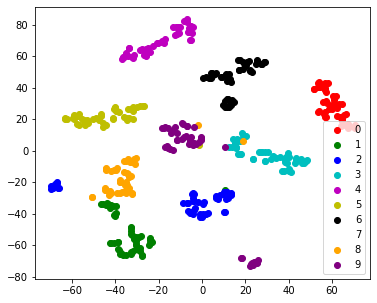

In [3]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

# Linear Discriminant analysis

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique. The main idea of LDA is to maximize the separability between the two groups so that we can make the best decision to classify them. LDA is like PCA which helps in dimensionality reduction, but it focuses on maximizing the separability among known categories by creating a new linear axis and projecting the data points on that axis.

LDA is very useful to find dimensions which aim at seperating cluster, thus you will have to know clusters before. LDA is not neccesarily a classifier, but can be used as one. Remember that LDA makes assumptions about normally distributed classes and equal class covariances

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

The general LDA approach is very similar to a Principal Component Analysis but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).